# Importing the Libraries

In [4]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [5]:
# Importing the dataset by using pandas

dataset1 = pd.read_csv("StudentsPerformance.csv")
dataset1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
dataset1.shape

(1000, 8)

In [7]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
dataset = dataset1.drop(columns=["gender","race/ethnicity","parental level of education","lunch","test preparation course"],axis=1)
dataset.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
math score       1000 non-null int64
reading score    1000 non-null int64
writing score    1000 non-null int64
dtypes: int64(3)
memory usage: 23.5 KB


In [10]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
dataset.isnull().sum()

math score       0
reading score    0
writing score    0
dtype: int64

In [12]:
duplicate = dataset.duplicated()
print(duplicate.sum())
dataset[duplicate]

22


,math score,reading score,writing score
222,55,65,62
240,73,68,66
416,71,74,68
431,61,72,70
452,65,77,74
597,53,54,48
613,65,77,74
614,82,93,93
633,75,88,85
645,65,81,81


In [13]:
dataset.drop_duplicates(inplace=True)

In [14]:
dpl = dataset.duplicated()
print(dpl.sum())

0


In [15]:
X = dataset

# K Means Clustering

In [16]:
from sklearn.cluster import KMeans

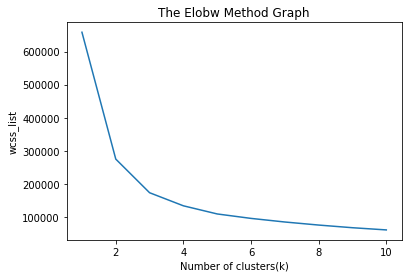

In [17]:
wcss_list= []
  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [19]:
km=KMeans(n_clusters=3)
km.fit(X)
km.labels_
X.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

Text(0.5, 1.0, 'math score vs writing score')

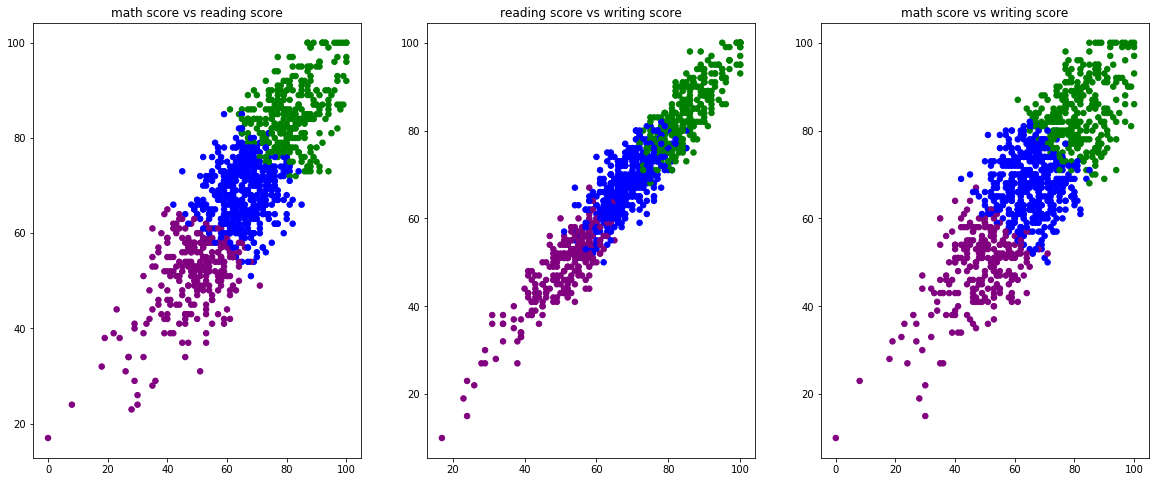

In [29]:
colormap=np.array(['purple','green','blue'])
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(X["math score"],X["reading score"],c=colormap[km.labels_],s=30)
plt.title("math score vs reading score")

plt.subplot(1,3,2)
plt.scatter(X["reading score"],X["writing score"],c=colormap[km.labels_],s=30)
plt.title("reading score vs writing score")

plt.subplot(1,3,3)
plt.scatter(X["math score"],X["writing score"],c=colormap[km.labels_],s=30)
plt.title("math score vs writing score")

# Hierarchical clustering

In [31]:
import scipy.cluster.hierarchy as sch

In [34]:
plt.figure(figsize=(200,150))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel('Marks')
plt.ylabel('Euclidean distance')
plt.show()

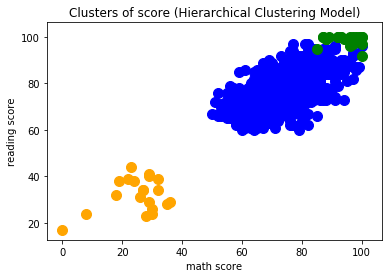

In [64]:
plt.scatter(X[y_hc==0]["math score"], X[y_hc==0]["reading score"], s=100, c='orange', label ='Cluster 1')
plt.scatter(X[y_hc==1]["math score"], X[y_hc==1]["reading score"], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2]["math score"], X[y_hc==2]["reading score"], s=100, c='green', label ='Cluster 3')
plt.title('Clusters of score (Hierarchical Clustering Model)')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()

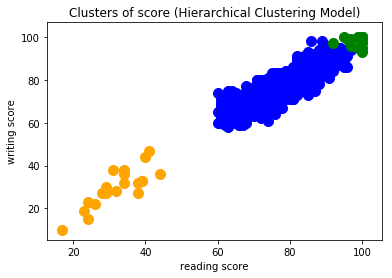

In [62]:
plt.scatter(X[y_hc==0]["reading score"], X[y_hc==0]["writing score"], s=100, c='orange', label ='Cluster 1')
plt.scatter(X[y_hc==1]["reading score"], X[y_hc==1]["writing score"], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2]["reading score"], X[y_hc==2]["writing score"], s=100, c='green', label ='Cluster 3')
plt.title('Clusters of score (Hierarchical Clustering Model)')
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.show()

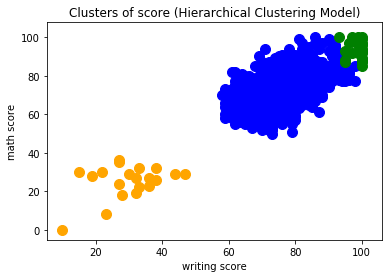

In [63]:
plt.scatter(X[y_hc==0]["writing score"], X[y_hc==0]["math score"], s=100, c='orange', label ='Cluster 1')
plt.scatter(X[y_hc==1]["writing score"], X[y_hc==1]["math score"], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2]["writing score"], X[y_hc==2]["math score"], s=100, c='green', label ='Cluster 3')
plt.title('Clusters of score (Hierarchical Clustering Model)')
plt.xlabel('writing score')
plt.ylabel('math score')
plt.show()

# DB Scan

In [65]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples = 8)
clusters = dbscan.fit_predict(X)

In [66]:
dbscan=DBSCAN(eps = 4, min_samples = 8)
clusters=dbscan.fit_predict(X)

In [67]:
clusters

array([ 0, -1,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
       -1,  2,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,
        0, -1, -1, -1,  0,  0,  2, -1, -1,  0,  0,  0,  0,  2,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        3,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  1,  0, -1,  0,  0,  0,  0,  0,
        0,  3,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0, -1,  4,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0

In [73]:
print(X.shape)

(978, 3)


Text(0.5, 1.0, 'DBSCAN')

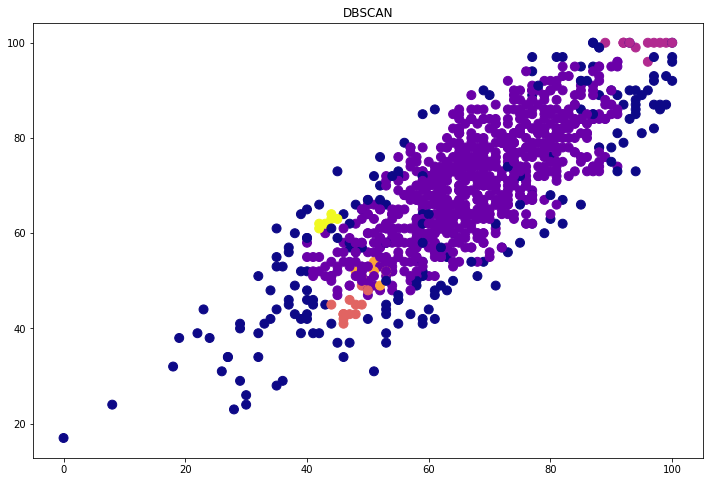

In [69]:
plt.figure(figsize=(12,8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1],c=clusters, cmap='plasma',s=80)
plt.title('DBSCAN')

Text(0.5, 1.0, 'DBSCAN')

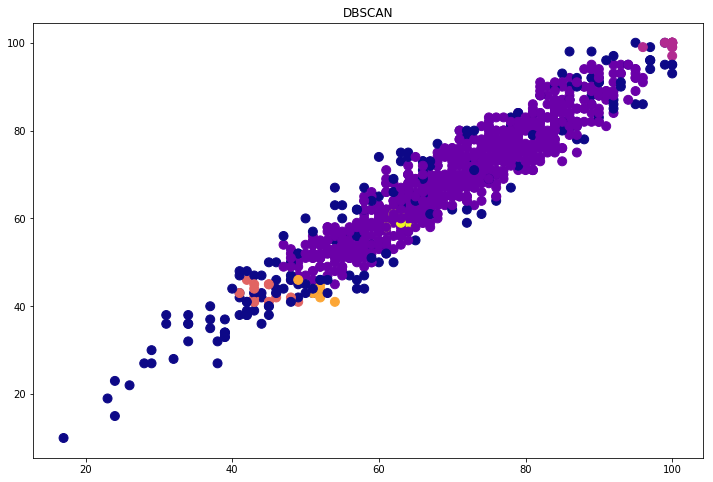

In [70]:
plt.figure(figsize=(12,8))
plt.scatter(X.iloc[:, 1], X.iloc[:, 2],c=clusters, cmap='plasma',s=80)
plt.title('DBSCAN')

Text(0.5, 1.0, 'DBSCAN')

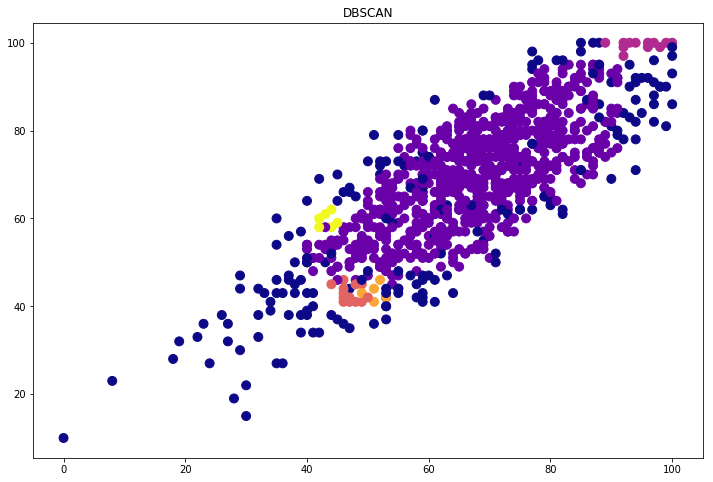

In [71]:
plt.figure(figsize=(12,8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 2],c=clusters, cmap='plasma',s=80)
plt.title('DBSCAN')